In [ ]:
#importing required libraries
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat



In [ ]:
# For plotting the graphs
def graph_plotting(C_list=[],accuracy_list=[],nsv_list=[], sigma_list=[]):

  plt.subplots_adjust(wspace=0.00001, hspace=0)
  plt.figure(0)
  plt.plot(C_list,accuracy_list)
  plt.ylabel('Accuracy(%)')
  plt.xlabel('C Values')
  plt.grid()
  plt.figure(1)
  plt.plot(C_list,nsv_list)
  plt.ylabel('No. of support vectors')
  plt.xlabel('C Values')
  plt.grid()

  if len(sigma_list)>0:
    plt.figure(3)
    plt.plot(C_list,sigma_list)
    plt.ylabel('Sigma Values')
    plt.xlabel('C Values')
    plt.grid()
    plt.figure(4)
    plt.plot(sigma_list,accuracy_list)
    plt.xlabel('Sigma Values')
    plt.ylabel('Accuracy(%)')
    plt.grid()
    plt.figure(5)
    plt.plot(sigma_list,nsv_list)
    plt.xlabel('Sigma Values')
    plt.ylabel('No. of support vectors')
    plt.grid()
    
  plt.show()

In [ ]:
# function to perform SVM
def perform_svm(C_list=[], kernel='rbf', degree=0, gamma=0):
  accuracy = []
  nsv = []
  if len(C_list) == 0:
    model = svm.SVC(kernel=kernel,degree=degree)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred)*100)
    nsv.append(len(model.support_))
  else:
    for c in C_list:
      if gamma == 0:
        model = svm.SVC(C=c, kernel=kernel,degree=degree)
      else:
        model = svm.SVC(C=c, kernel=kernel,gamma=gamma)
      model.fit(x_train,y_train)
      y_pred = model.predict(x_test)
      accuracy.append(accuracy_score(y_test,y_pred)*100)
      nsv.append(len(model.support_))
  return accuracy,nsv

Plots for Linear kernel


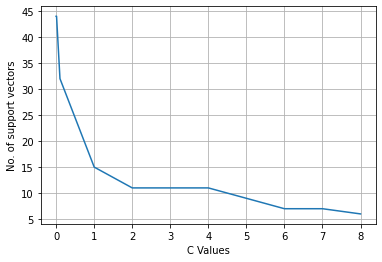

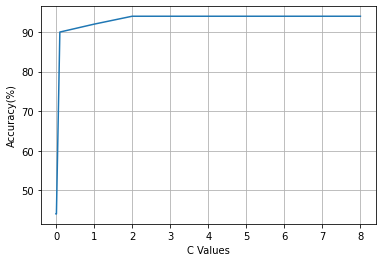

Plots for Constant C and Varying Degree
Plots for Degree 1


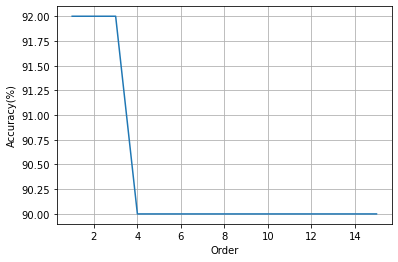

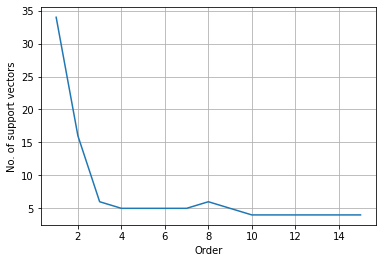

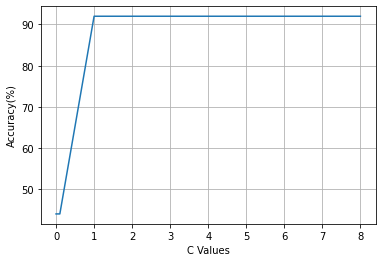

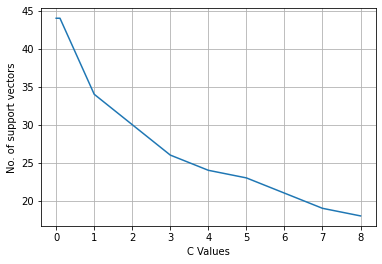

Plots for Degree 2


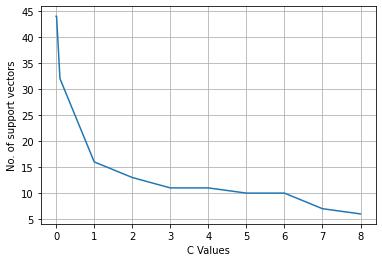

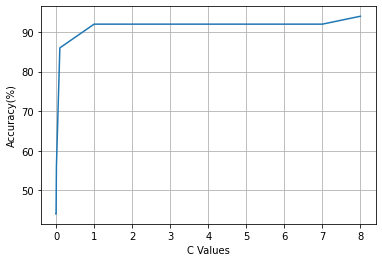

Plots for Degree 3


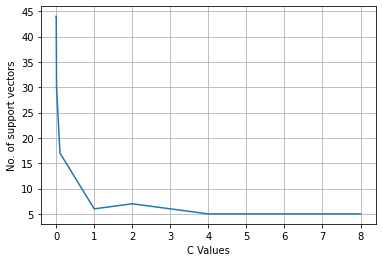

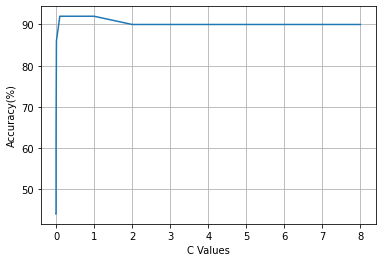

Plots for Degree 4


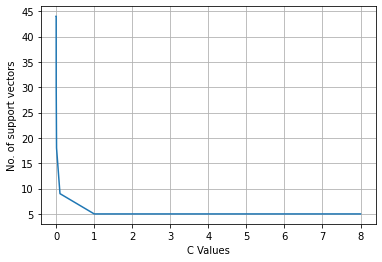

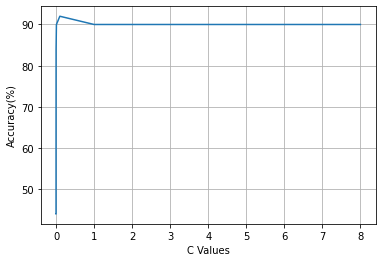

Plots for Degree 5


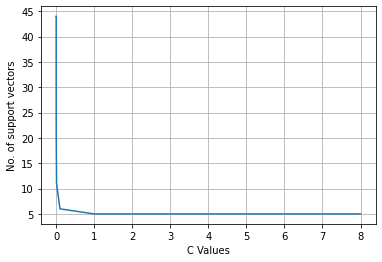

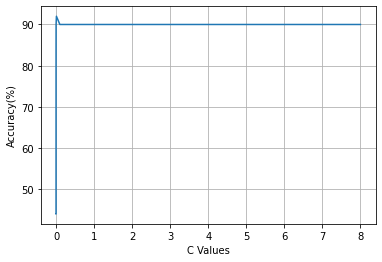

Plots for Degree 6


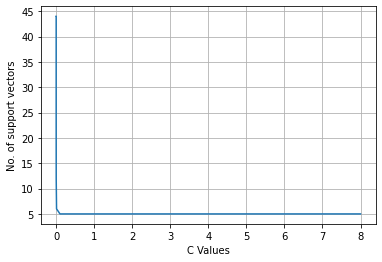

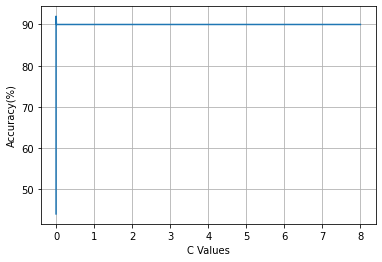

Plots for Degree 7


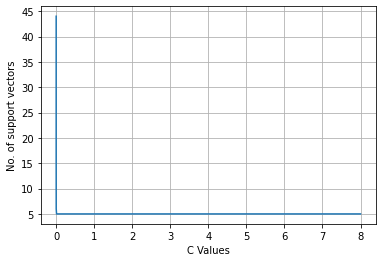

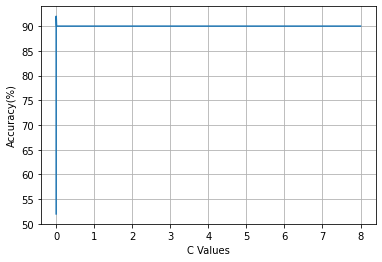

Plots for Degree 8


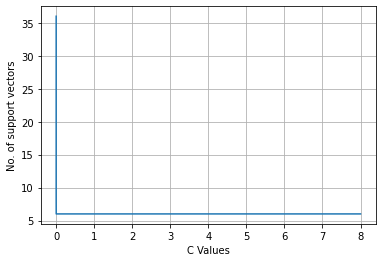

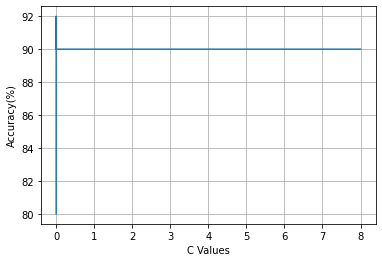

Plots for Degree 9


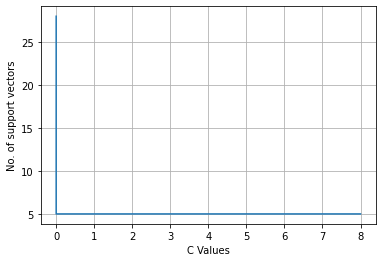

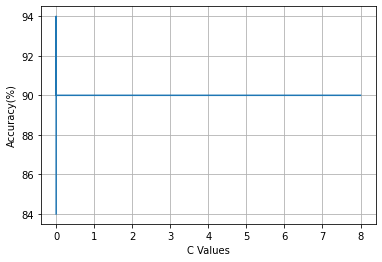

Plots for Degree 10


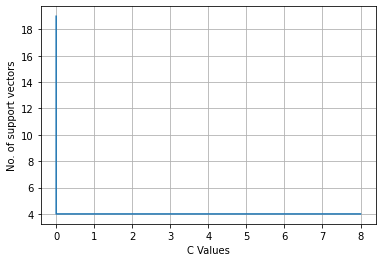

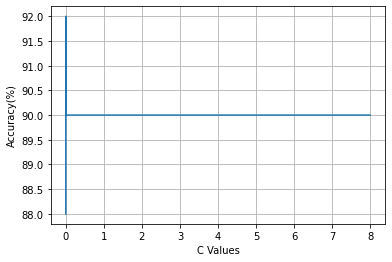

Plots for Degree 11


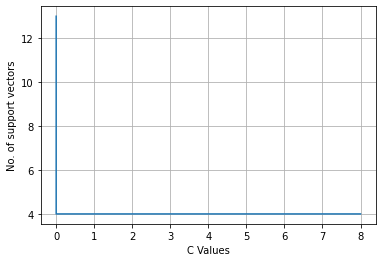

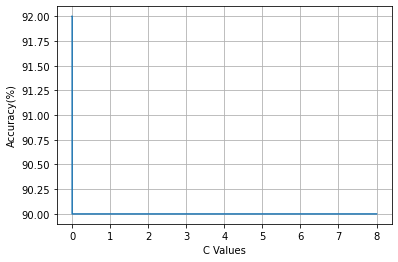

Plots for Degree 12


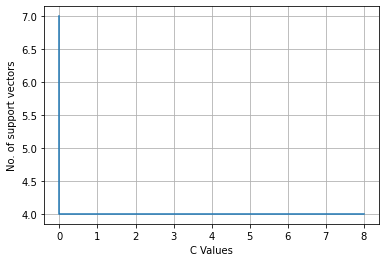

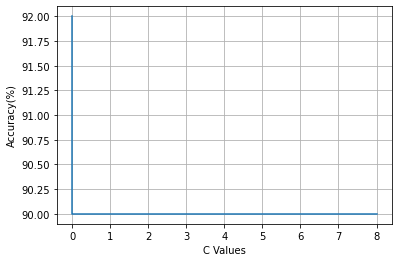

Plots for Degree 13


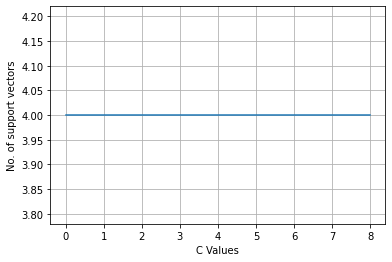

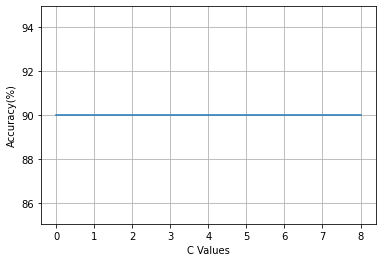

Plots for Degree 14


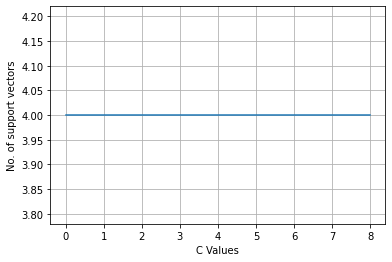

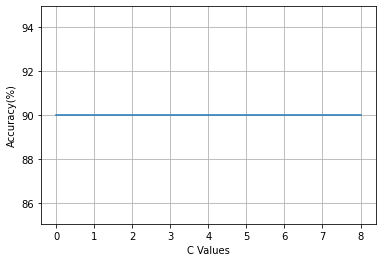

Plots for Degree 15


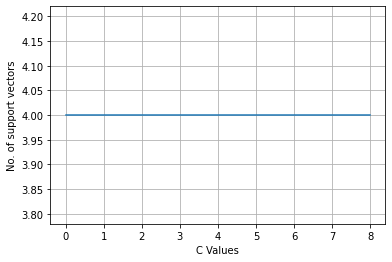

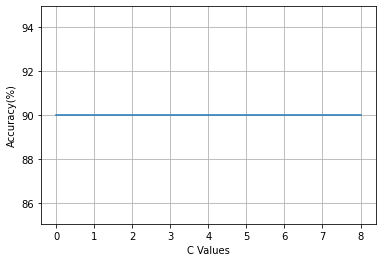

Plots for Constant C and Varying sigma
Plots for RBF kernel for sigma 1e-07


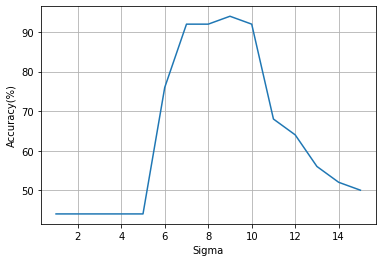

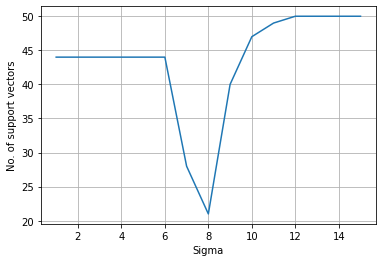

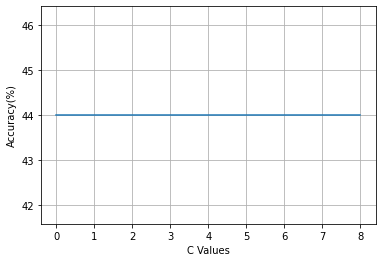

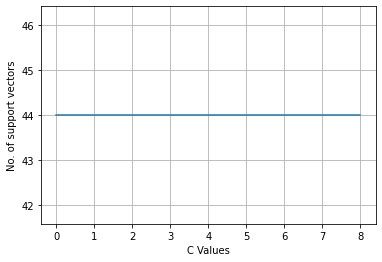

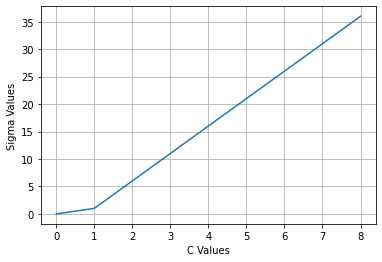

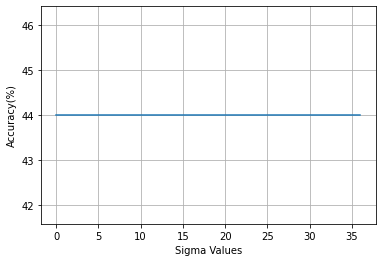

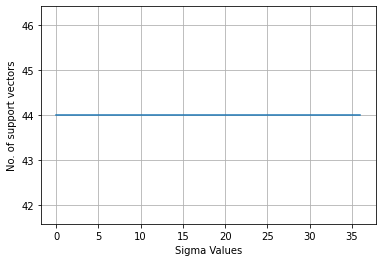

Plots for RBF kernel for sigma 1e-06


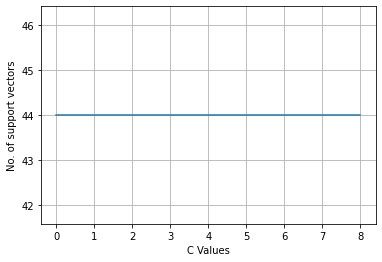

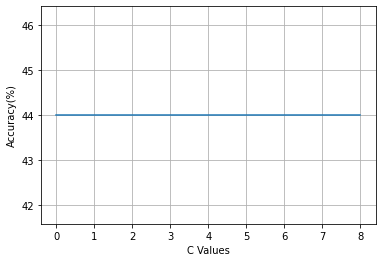

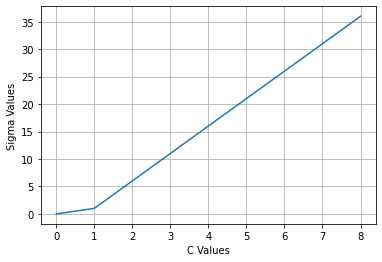

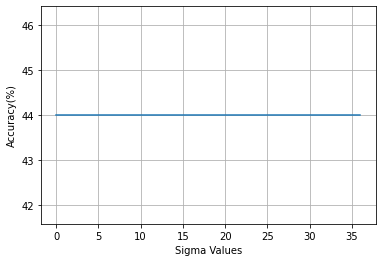

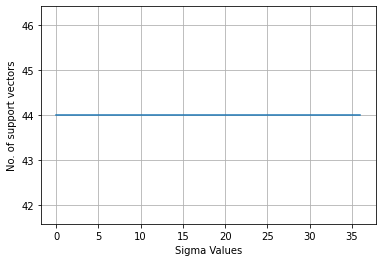

Plots for RBF kernel for sigma 1e-05


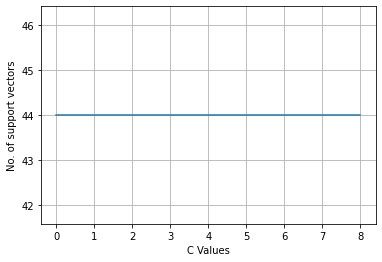

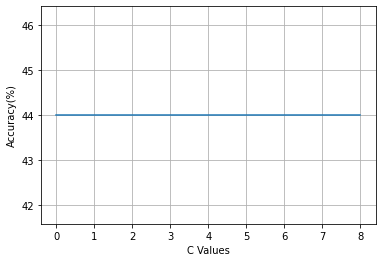

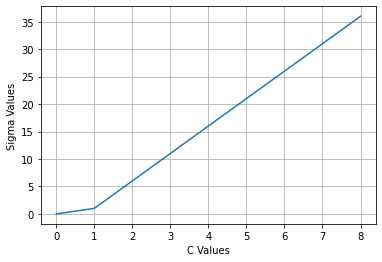

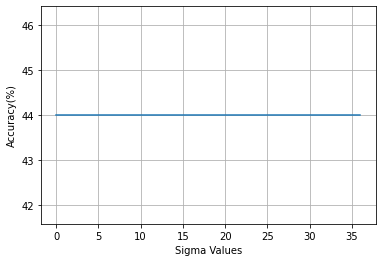

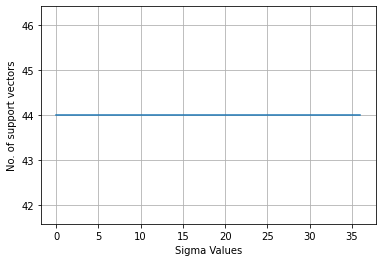

Plots for RBF kernel for sigma 0.0001


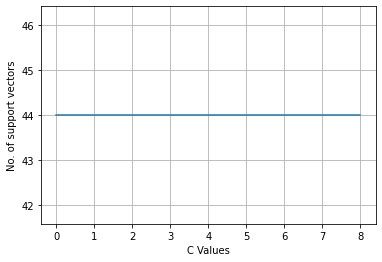

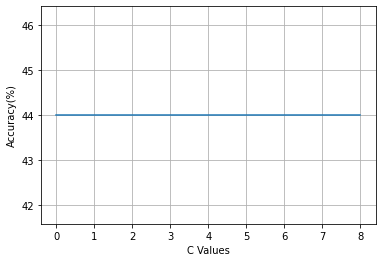

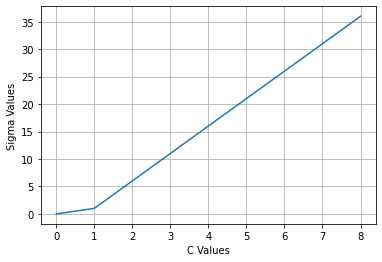

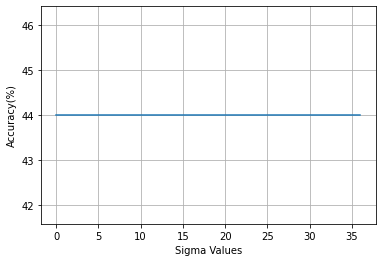

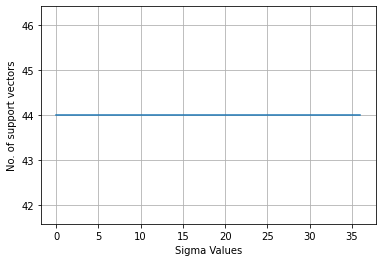

Plots for RBF kernel for sigma 0.001


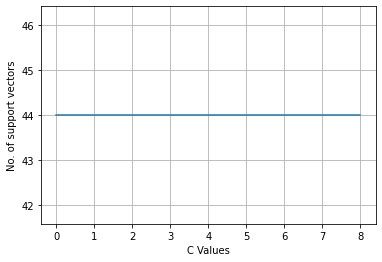

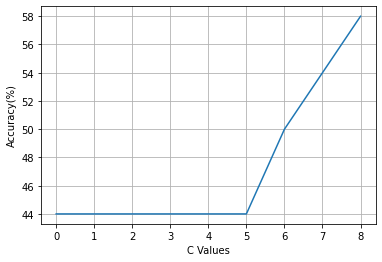

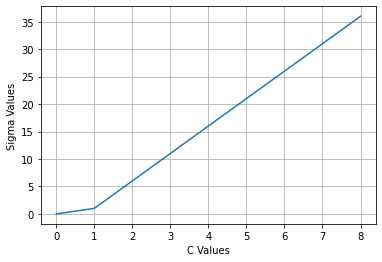

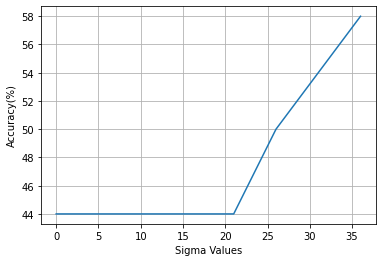

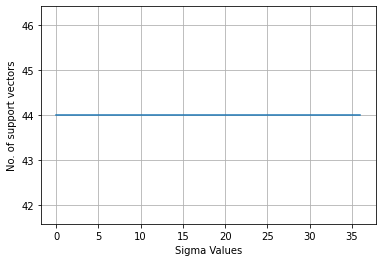

Plots for RBF kernel for sigma 0.01


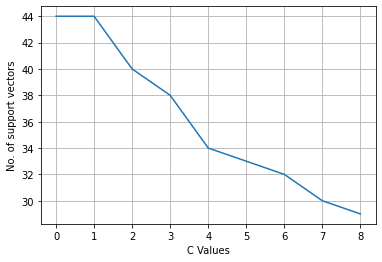

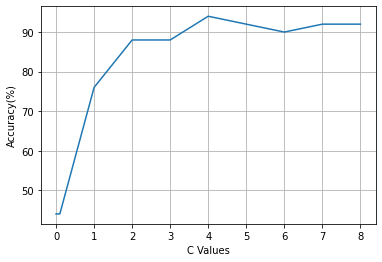

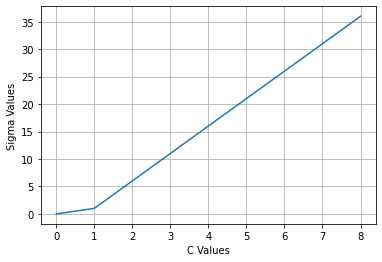

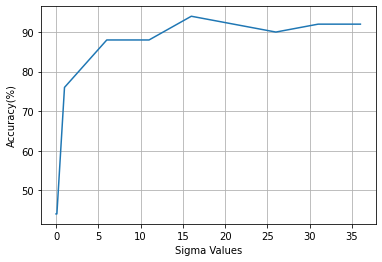

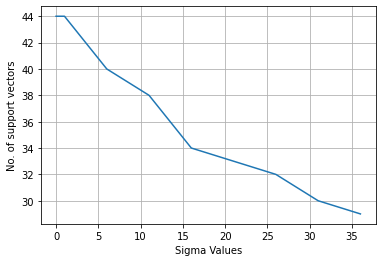

Plots for RBF kernel for sigma 0.1


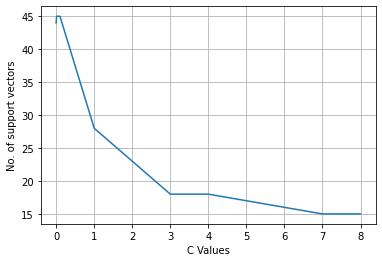

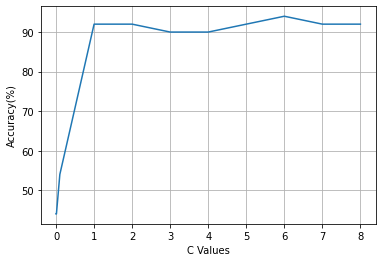

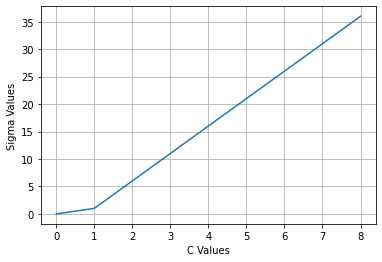

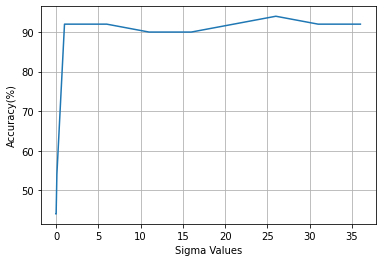

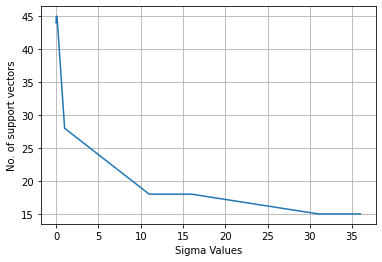

Plots for RBF kernel for sigma 1


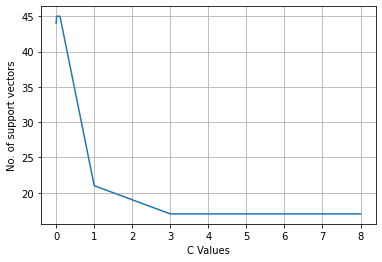

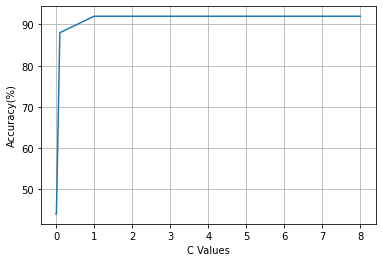

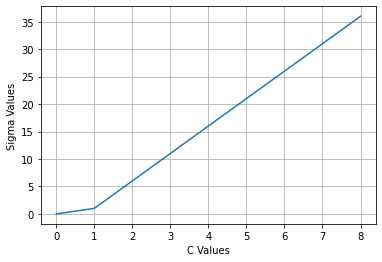

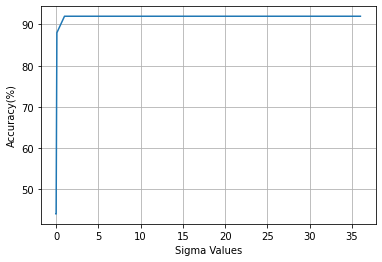

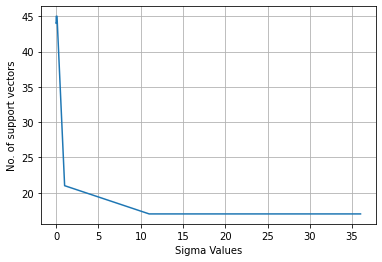

Plots for RBF kernel for sigma 6


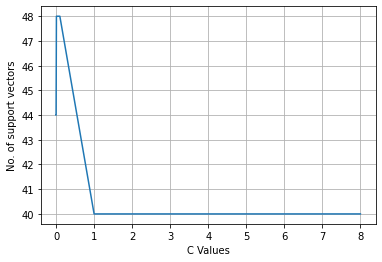

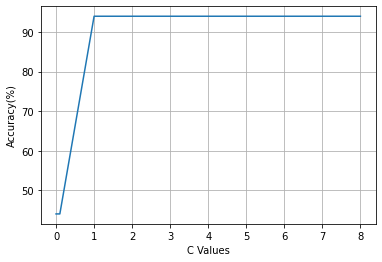

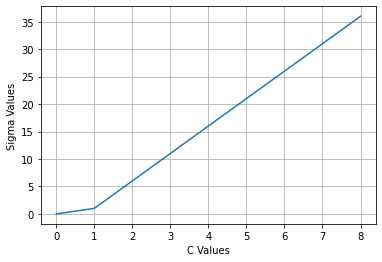

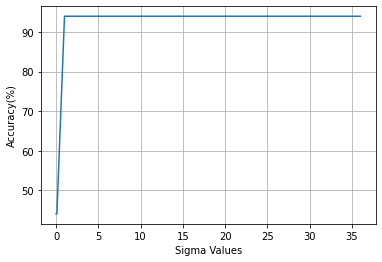

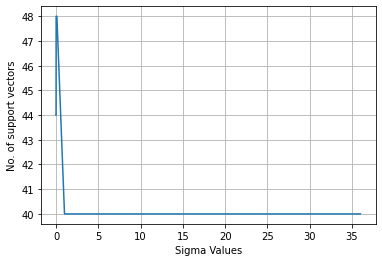

Plots for RBF kernel for sigma 11


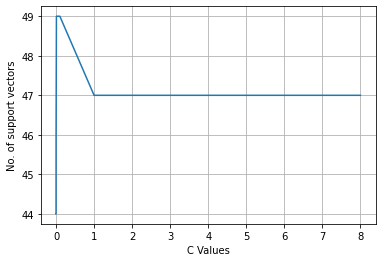

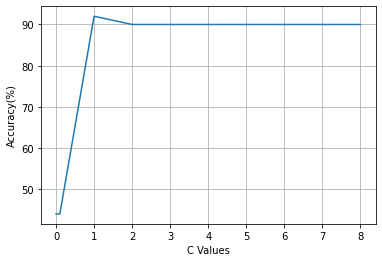

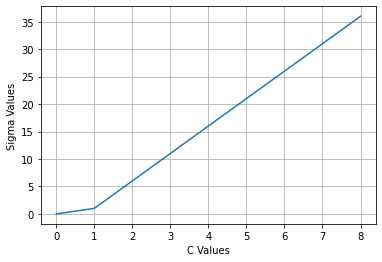

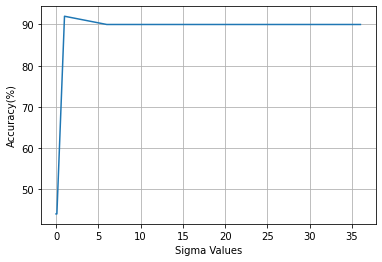

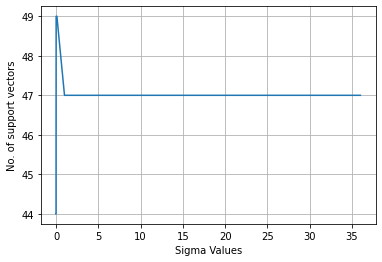

Plots for RBF kernel for sigma 16


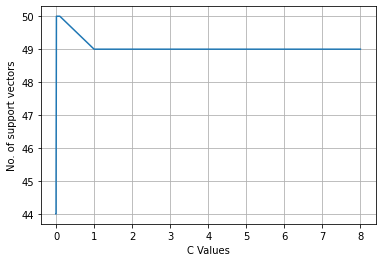

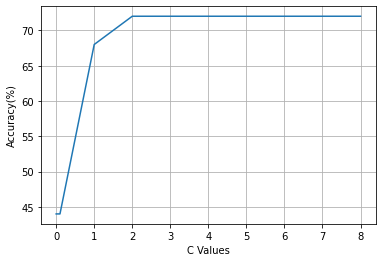

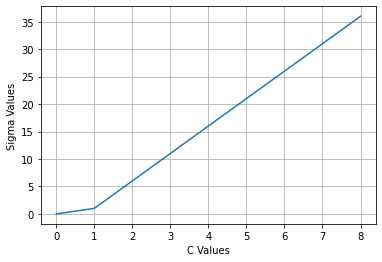

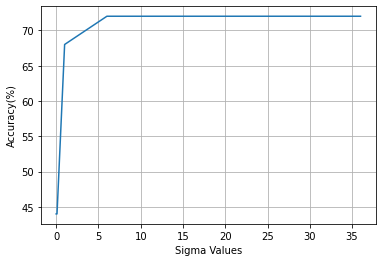

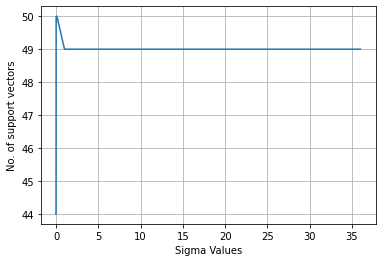

Plots for RBF kernel for sigma 21


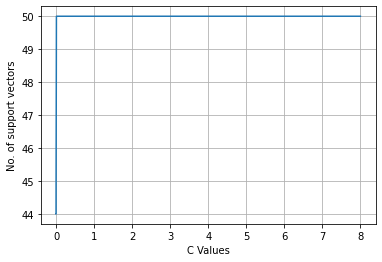

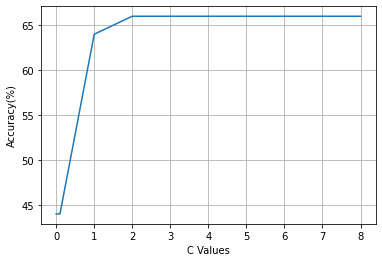

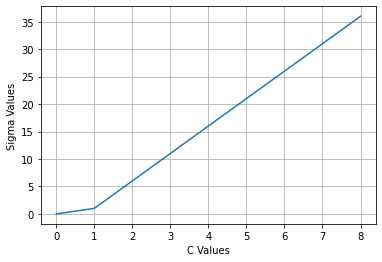

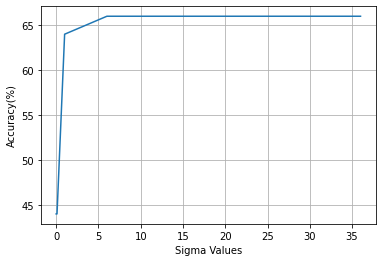

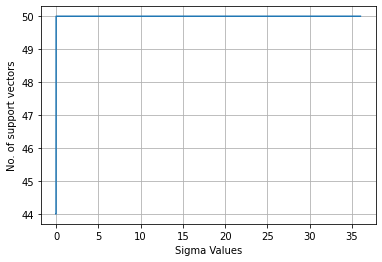

Plots for RBF kernel for sigma 26


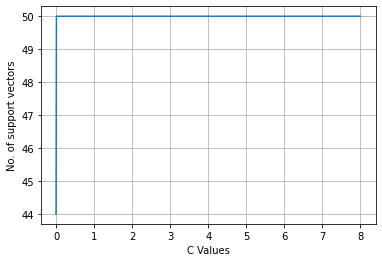

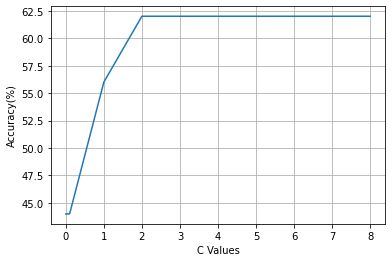

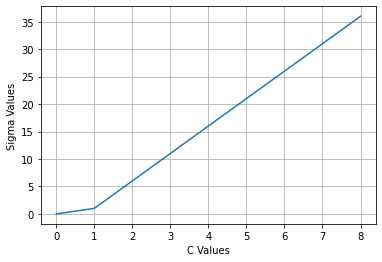

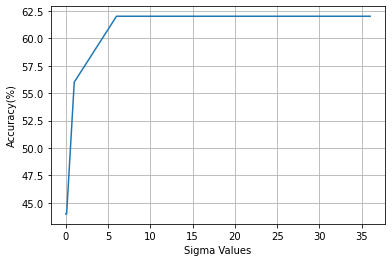

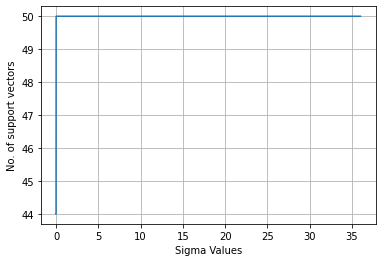

Plots for RBF kernel for sigma 31


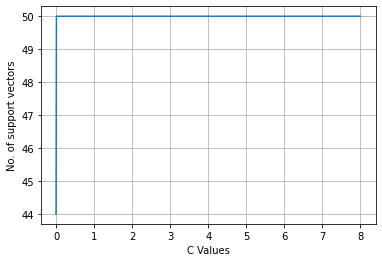

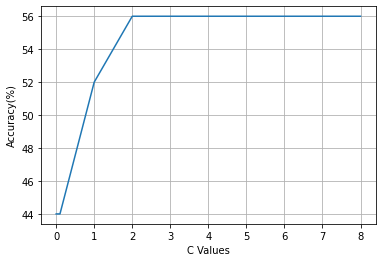

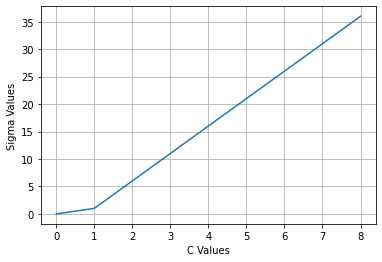

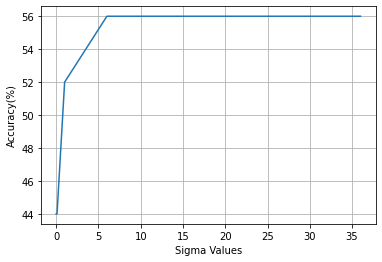

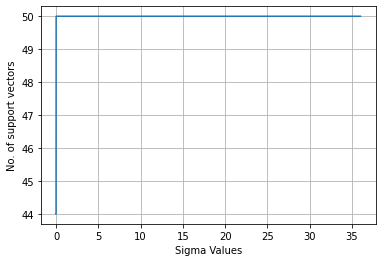

Plots for RBF kernel for sigma 36


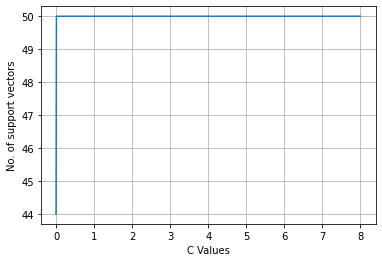

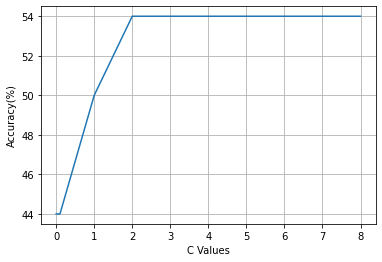

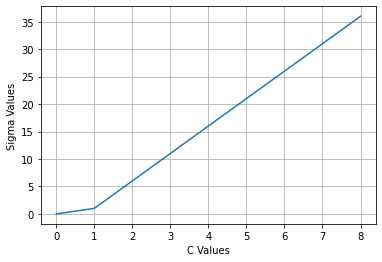

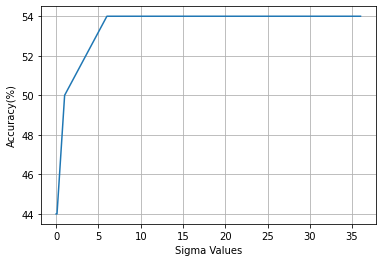

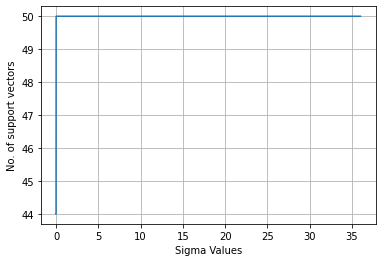

In [ ]:
data = loadmat('dataset.mat')
x = data['X']
y = data['Y']
y = y.reshape([-1,])
    
indices = np.random.permutation(x.shape[0])
test_size = int(x.shape[0]*0.5)
train_indices, test_indices = indices[:test_size], indices[test_size:]
x_train, x_test = x[train_indices], x[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# For Linear Kernel
C_list = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,6,7,8]
accuracy_list, nsv_list = perform_svm(C_list=C_list, kernel='linear')
print("Plots for Linear kernel")
graph_plotting(C_list=C_list, accuracy_list=accuracy_list,nsv_list=nsv_list)

# For Polynomial Kernel
C_list = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,6,7,8]
poly_degrees = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
accuracy_list, nsv_list = [],[]

# For varying order and constant C
for degree in poly_degrees:
  model = svm.SVC(C=1, kernel='poly',degree=degree)
  model.fit(x_train,y_train)
  accuracy_list.append(model.score(x_test, y_test)*100)
  nsv_list.append(len(model.support_)) 
print("Plots for Constant C and Varying Degree")
plt.figure(7)
plt.plot(poly_degrees,accuracy_list)
plt.ylabel('Accuracy(%)')
plt.xlabel('Order')
plt.grid()
plt.figure(8)
plt.plot(poly_degrees,nsv_list)
plt.ylabel('No. of support vectors')
plt.xlabel('Order')
plt.grid()

accuracy_list, nsv_list = [],[]

# For constant order and varying C
for degree in poly_degrees:
  accuracy_list, nsv_list = perform_svm(C_list=C_list, kernel='poly',
                                        degree=degree)
  print("Plots for Degree {0}".format(degree))
  graph_plotting(C_list=C_list, accuracy_list=accuracy_list, nsv_list=nsv_list)

accuracy_list, nsv_list = [],[]

# For RBF with const C but variable sigma(gamma here)
C_list = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,6,7,8]
sigma_list = [1e-7,1e-6,1e-5,1e-4,0.001,0.01,0.1,1,6,11,16,21,26,31,36]
for sigma in sigma_list:
  
  model = svm.SVC(C=1, kernel='rbf',gamma=sigma)
  model.fit(x_train,y_train)
  accuracy_list.append(model.score(x_test, y_test)*100)
  nsv_list.append(len(model.support_))
print("Plots for Constant C and Varying sigma")
plt.figure(9)
plt.plot(poly_degrees,accuracy_list)
plt.ylabel('Accuracy(%)')
plt.xlabel('Sigma')
plt.grid()
plt.figure(10)
plt.plot(poly_degrees,nsv_list)
plt.ylabel('No. of support vectors')
plt.xlabel('Sigma')
plt.grid()

# For RBF with variable C but constant sigma(gamma here)
for sigma in sigma_list:
  accuracy_list, nsv_list = perform_svm(C_list=C_list, kernel='rbf',
                                        gamma=sigma)
  print("Plots for RBF kernel for sigma {0}".format(sigma))
  graph_plotting(C_list=C_list, accuracy_list=accuracy_list, nsv_list=nsv_list, 
                 sigma_list=sigma_list)
  


